In [1]:
import math
import cmath
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def bit_reversal_permutation(x):
    """Reorganiza os índices em ordem de bit-reversal."""
    N = len(x)
    j = 0
    for i in range(1, N):
        bit = N >> 1
        while j >= bit:
            j -= bit
            bit >>= 1
        j += bit
        if i < j:
            x[i], x[j] = x[j], x[i]

In [3]:
def fft_butterfly(x):
    """Calcula a FFT usando o método da borboleta."""
    N = len(x)
    bit_reversal_permutation(x)  # Reorganiza os dados
    
    # Número de estágios é log2(N)
    num_stages = int(math.log2(N))
    
    for stage in range(num_stages):
        # Número de pontos
        m = 2 ** (stage + 1)
        half_m = m // 2
        
        # Twiddle factor
        w_m = cmath.exp(-2j * cmath.pi / m)
        
        for k in range(0, N, m):
            w = 1
            for j in range(half_m):
                t = w * x[k + j + half_m]  # Multiplicação pelo fator de ajuste
                u = x[k + j]               # Elemento superior da borboleta
                
                # Operações da borboleta
                x[k + j] = u + t
                x[k + j + half_m] = u - t
                
                w *= w_m  # Atualiza o fator de ajuste para o próximo par

In [6]:
# Criando o sinal: cos(2*pi*n/10)
N = 1024  # Número de pontos (potência de 2 para a FFT)

n = np.arange(N)  # Vetor de índices

#sinal = np.cos(2 * np.pi * n / 10)  # Sinal cos(2*pi*n/10)

largura = 50  

sinal = np.where((n >= (N//2 - largura//2)) & (n < (N//2 + largura//2)), 1, 0)

# Convertendo o sinal para formato complexo para aplicar a FFT
entrada = [complex(val, 0) for val in sinal]

# Aplicando a FFT pelo método da borboleta
fft_butterfly(entrada)

# Calculando a magnitude da FFT para plotar
magnitude = np.abs(entrada)

# Calculando manualmente as frequências
frequencias = [(i if i < N//2 else i - N) for i in range(N)]  # Frequências simétricas

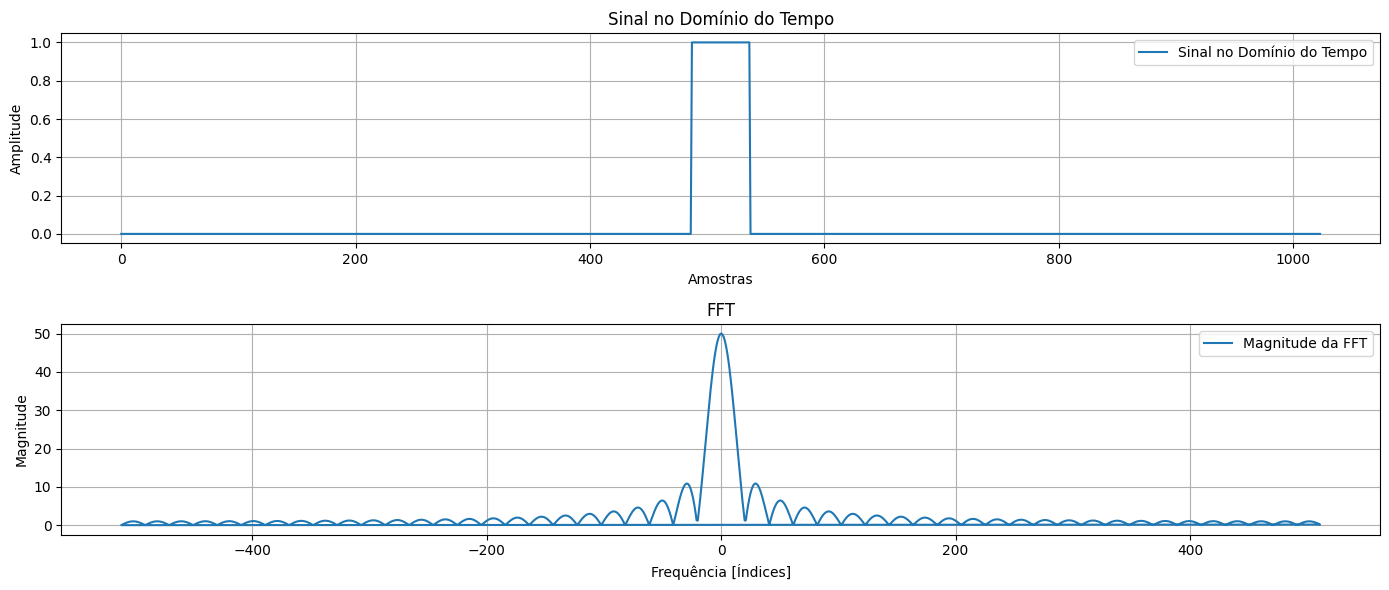

In [7]:
# Plotando o sinal no domínio do tempo
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(n, sinal, label='Sinal no Domínio do Tempo')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Sinal no Domínio do Tempo')
plt.grid(True)
plt.legend()

# Plotando a FFT no domínio da frequência
plt.subplot(2, 1, 2)
plt.plot(frequencias, magnitude, label='Magnitude da FFT')  # Mostra todas as frequências, positivas e negativas
plt.xlabel('Frequência [Índices]')
plt.ylabel('Magnitude')
plt.title('Sinal no Domínio da Frequência')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
